In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [ ]:
train_data[0]

In [7]:
word_index = reuters.get_word_index()

550378/550378 [==============================] - 0s 0us/step


In [ ]:
word_index

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
reverse_word_index

In [18]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [19]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate (sequences):
    results[i,sequence] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [23]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [24]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate (labels):
    results[i,label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [25]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Inbuilt funtion in keras for one hot encoding the labels in categorical dataset
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

As this is a multiclass classifictaion problem with 46 dimensions, we cannot use layers with 16 dimensions as it will drop the relevant information for the model. Thus using layers with 64 units and the last layer with 46 units.

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [31]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (X_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 2.6759 - acc: 0.4803 - val_loss: 1.7298 - val_acc: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4229 - acc: 0.7131 - val_loss: 1.2835 - val_acc: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0595 - acc: 0.7777 - val_loss: 1.1255 - val_acc: 0.7500
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8431 - acc: 0.8205 - val_loss: 1.0362 - val_acc: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6784 - acc: 0.8540 - val_loss: 0.9589 - val_acc: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5449 - acc: 0.8842 - val_loss: 0.9630 - val_acc: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4402 - acc: 0.9058 - val_loss: 0.9059 - val_acc: 0.7990
Epoch 8/20
16/16 [==============================] - 1s 46ms/step - loss: 0.3570 - a

In [34]:
import matplotlib.pyplot as plt

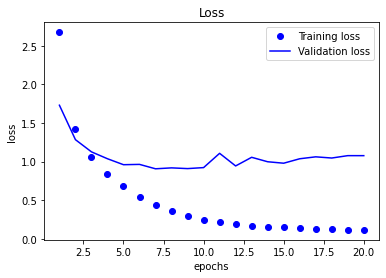

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'blue', label = 'Validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

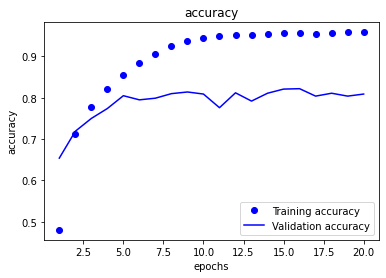

In [39]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
epochs = range(1, len(loss)+1)
plt.plot(epochs,accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs,val_accuracy, 'blue', label = 'Validation accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Retraining the model from scratch

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

model.fit(partial_X_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (X_val,y_val))

results = model.evaluate(X_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 63ms/step - loss: 2.6996 - acc: 0.4894 - val_loss: 1.7859 - val_acc: 0.6480
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 1.4461 - acc: 0.7116 - val_loss: 1.3109 - val_acc: 0.7270
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0619 - acc: 0.7727 - val_loss: 1.1332 - val_acc: 0.7600
Epoch 4/9
16/16 [==============================] - 1s 48ms/step - loss: 0.8415 - acc: 0.8182 - val_loss: 1.0476 - val_acc: 0.7730
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6779 - acc: 0.8528 - val_loss: 1.0038 - val_acc: 0.7790
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5495 - acc: 0.8837 - val_loss: 0.9508 - val_acc: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4432 - acc: 0.9084 - val_loss: 0.9564 - val_acc: 0.8010
Epoch 8/9
16/16 [==============================] - 1s 48ms/step - loss: 0.3693 - acc: 0.92

In [43]:
results

[1.0021414756774902, 0.7836152911186218]

In [44]:
predictions = model.predict(X_test)

71/71 [==============================] - 1s 6ms/step


In [45]:
predictions[0]

array([3.2131589e-05, 4.3131975e-05, 1.1883740e-06, 9.8626381e-01,
       7.7658109e-03, 1.2417662e-05, 1.3210523e-04, 1.9057590e-05,
       9.0823311e-04, 9.4561692e-06, 8.6314445e-05, 1.6351775e-04,
       1.9622390e-04, 1.1143686e-05, 3.6153055e-05, 4.0059153e-06,
       1.8684020e-04, 5.2762305e-05, 1.4906829e-04, 5.7023735e-04,
       2.2826567e-03, 5.2668849e-05, 1.9211998e-06, 9.5145850e-05,
       3.7267907e-06, 1.0728266e-04, 1.0318783e-05, 2.1975175e-06,
       1.7116854e-05, 4.1544463e-05, 1.3153060e-04, 2.3747296e-05,
       2.8298768e-06, 9.1619486e-06, 1.9054902e-05, 5.6249742e-06,
       6.7454348e-05, 2.0520723e-05, 1.5551556e-06, 3.5729117e-04,
       5.6984918e-06, 3.5073073e-05, 4.7870653e-06, 4.9541686e-05,
       7.5821690e-06, 3.0852442e-07], dtype=float32)

In [46]:
np.sum(predictions[0])

0.9999998

In [48]:
np.argmax(predictions[0])

3